Data characteristics

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
df = pd.read_csv('https://data.lacity.org/api/views/2nrs-mtv8/rows.csv')
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
5,200209713,05/03/2020 12:00:00 AM,05/02/2020 12:00:00 AM,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 W 4TH ST,NaN,34.0642,-118.2771
6,200200759,07/07/2020 12:00:00 AM,07/07/2020 12:00:00 AM,1340,2,Rampart,265,1,648,ARSON,0329 1402 2004 1501,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,648.0,998.0,NaN,NaN,JAMES M WOOD,ALVARADO,34.0536,-118.2788
7,201308739,03/27/2020 12:00:00 AM,03/27/2020 12:00:00 AM,1210,13,Newton,1333,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3200 S SAN PEDRO ST,NaN,34.0170,-118.2643
8,201112065,07/31/2020 12:00:00 AM,07/30/2020 12:00:00 AM,2030,11,Northeast,1161,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,NaN,NaN,NaN,KENMORE ST,FOUNTAIN,34.0953,-118.2974
9,200121929,12/04/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2300,1,Central,105,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,400 SOLANO AV,NaN,34.0710,-118.2302


In [2]:
print('Data Types->')
df.info()

Data Types->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986873 entries, 0 to 986872
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           986873 non-null  int64  
 1   Date Rptd       986873 non-null  object 
 2   DATE OCC        986873 non-null  object 
 3   TIME OCC        986873 non-null  int64  
 4   AREA            986873 non-null  int64  
 5   AREA NAME       986873 non-null  object 
 6   Rpt Dist No     986873 non-null  int64  
 7   Part 1-2        986873 non-null  int64  
 8   Crm Cd          986873 non-null  int64  
 9   Crm Cd Desc     986873 non-null  object 
 10  Mocodes         839400 non-null  object 
 11  Vict Age        986873 non-null  int64  
 12  Vict Sex        846266 non-null  object 
 13  Vict Descent    846254 non-null  object 
 14  Premis Cd       986857 non-null  float64
 15  Premis Desc     986291 non-null  object 
 16  Weapon Used Cd  325035 non-null  float64
 1

Data collection and manipulation

In [3]:
print('Duplicate Values ->')
print(df.duplicated().sum())
df = df.drop_duplicates()
print('After Removing Duplicates ->',df.duplicated().sum())

Duplicate Values ->
53448
After Removing Duplicates -> 0


In [4]:
print('Missing Values ->')
print (df.columns[df.isnull().sum() > 0])
print(df.isnull().mean() * 100)
print (df.columns[(df.isnull().mean() * 100) > 50])

Missing Values ->
Index(['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'Cross Street'],
      dtype='object')
DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           15.013847
Vict Age           0.000000
Vict Sex          14.329700
Vict Descent      14.330985
Premis Cd          0.001607
Premis Desc        0.061065
Weapon Used Cd    67.209149
Weapon Desc       67.209149
Status             0.000107
Status Desc        0.000000
Crm Cd 1           0.001178
Crm Cd 2          93.145780
Crm Cd 3          99.774915
Crm Cd 4          99.994001
LOCATION           0.000000
Cross Street      84.580872
LAT                0.000000
LON     

In [5]:
df = df.drop(columns=['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'])

In [6]:
print (df.isnull().mean() * 100)

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           15.013847
Vict Age           0.000000
Vict Sex          14.329700
Vict Descent      14.330985
Premis Cd          0.001607
Premis Desc        0.061065
Weapon Used Cd    67.209149
Weapon Desc       67.209149
Status             0.000107
Status Desc        0.000000
Crm Cd 1           0.001178
LOCATION           0.000000
Cross Street      84.580872
LAT                0.000000
LON                0.000000
dtype: float64


In [7]:
print(df['Weapon Desc'].unique())
print(df['Vict Sex'].unique())
print(df['Vict Descent'].unique())
print(df['Weapon Used Cd'].unique())
print(df['Mocodes'].unique())

[nan 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' 'VERBAL THREAT'
 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH' 'UNKNOWN WEAPON/OTHER WEAPON'
 'MACHETE' 'HAND GUN' 'SEMI-AUTOMATIC PISTOL' 'SIMULATED GUN' 'HAMMER'
 'RAZOR' 'OTHER FIREARM' 'KITCHEN KNIFE' 'STICK' 'UNKNOWN FIREARM'
 'KNIFE WITH BLADE 6INCHES OR LESS' 'PIPE/METAL PIPE'
 'AIR PISTOL/REVOLVER/RIFLE/BB GUN' 'OTHER CUTTING INSTRUMENT' 'SCISSORS'
 'SWITCH BLADE' 'ROCK/THROWN OBJECT' 'OTHER KNIFE' 'BOTTLE' 'CLUB/BAT'
 'BLUNT INSTRUMENT' 'BOARD' 'PHYSICAL PRESENCE' 'RIFLE' 'REVOLVER'
 'CLEAVER' 'STUN GUN' 'SCREWDRIVER' 'UNKNOWN TYPE CUTTING INSTRUMENT'
 'FOLDING KNIFE' 'VEHICLE' 'MACE/PEPPER SPRAY' 'FIRE'
 'CAUSTIC CHEMICAL/POISON' 'SHOTGUN' 'FIXED OBJECT' 'SEMI-AUTOMATIC RIFLE'
 'BELT FLAILING INSTRUMENT/CHAIN' 'BRASS KNUCKLES' 'TIRE IRON'
 'CONCRETE BLOCK/BRICK' 'AXE' 'SAWED OFF RIFLE/SHOTGUN'
 'MARTIAL ARTS WEAPONS' 'DEMAND NOTE' 'DIRK/DAGGER' 'TOY GUN' 'GLASS'
 'BOMB THREAT' 'RAZOR BLADE' 'ASSAULT WEAPON/UZI/AK47/ETC'
 'HEC

In [8]:
df['Cross Street'] = df['Cross Street'].fillna('UNKNOWN')
df['Vict Descent'] = df['Vict Descent'].replace('-', np.nan)
df['Vict Sex'] = df['Vict Descent'].replace('-', np.nan)

In [9]:
lat_min, lat_max = 33.7, 34.8
lon_min, lon_max = -118.7, -118.1
df['LAT'] = df['LAT'].replace(0, np.nan)
df['LON'] = df['LON'].replace(0, np.nan)
df['LAT'] = df['LAT'].apply(lambda x: np.random.uniform(lat_min, lat_max) if np.isnan(x) else x)
df['LON'] = df['LON'].apply(lambda x: np.random.uniform(lon_min, lon_max) if np.isnan(x) else x)
print(df[['LAT', 'LON']].head())


       LAT       LON
0  34.0375 -118.3506
1  34.0444 -118.2628
2  34.0210 -118.3002
3  34.1576 -118.4387
4  34.0820 -118.2130


In [10]:
print (df.isnull().mean() * 100)

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           15.013847
Vict Age           0.000000
Vict Sex          14.331200
Vict Descent      14.331200
Premis Cd          0.001607
Premis Desc        0.061065
Weapon Used Cd    67.209149
Weapon Desc       67.209149
Status             0.000107
Status Desc        0.000000
Crm Cd 1           0.001178
LOCATION           0.000000
Cross Street       0.000000
LAT                0.000000
LON                0.000000
dtype: float64


In [11]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

Data preprocessing

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
categoricalColumns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numericalColumns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', SimpleImputer(strategy='most_frequent'), categoricalColumns),
        ('num', SimpleImputer(strategy='median'), numericalColumns)
    ]
)
transformedData = preprocessor.fit_transform(df)
all_columns = categoricalColumns + numericalColumns
df_transformed = pd.DataFrame(data=transformedData, columns=all_columns)
for col in categoricalColumns:
    df_transformed[col] = df_transformed[col].astype('category')
for col in numericalColumns:
    df_transformed[col] = pd.to_numeric(df_transformed[col])
print(df_transformed.isnull().mean() * 100)
print(df_transformed.dtypes)
print(df_transformed.head())
print(df_transformed.isnull().mean() * 100)
df_transformed.head()


Date Rptd         0.0
DATE OCC          0.0
AREA NAME         0.0
Crm Cd Desc       0.0
Mocodes           0.0
Vict Sex          0.0
Vict Descent      0.0
Premis Desc       0.0
Weapon Desc       0.0
Status            0.0
Status Desc       0.0
LOCATION          0.0
Cross Street      0.0
DR_NO             0.0
TIME OCC          0.0
AREA              0.0
Rpt Dist No       0.0
Part 1-2          0.0
Crm Cd            0.0
Vict Age          0.0
Premis Cd         0.0
Weapon Used Cd    0.0
Crm Cd 1          0.0
LAT               0.0
LON               0.0
dtype: float64
Date Rptd         category
DATE OCC          category
AREA NAME         category
Crm Cd Desc       category
Mocodes           category
Vict Sex          category
Vict Descent      category
Premis Desc       category
Weapon Desc       category
Status            category
Status Desc       category
LOCATION          category
Cross Street      category
DR_NO              float64
TIME OCC           float64
AREA               float64
Rpt

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,Wilshire,VEHICLE - STOLEN,0344,O,O,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,1900 S LONGWOOD AV,UNKNOWN,190326475.0,2130.0,7.0,784.0,1.0,510.0,0.0,101.0,400.0,510.0,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,Central,BURGLARY FROM VEHICLE,1822 1402 0344,O,O,BUS STOP/LAYOVER (ALSO QUERY 124),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1000 S FLOWER ST,UNKNOWN,200106753.0,1800.0,1.0,182.0,1.0,330.0,47.0,128.0,400.0,330.0,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,Southwest,BIKE - STOLEN,0344 1251,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1400 W 37TH ST,UNKNOWN,200320258.0,1700.0,3.0,356.0,1.0,480.0,19.0,502.0,400.0,480.0,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,O,O,CLOTHING STORE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,14000 RIVERSIDE DR,UNKNOWN,200907217.0,2037.0,9.0,964.0,1.0,343.0,19.0,405.0,400.0,343.0,34.1576,-118.4387
4,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,Hollenbeck,VEHICLE - STOLEN,0344,H,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,200 E AVENUE 28,UNKNOWN,200412582.0,630.0,4.0,413.0,1.0,510.0,0.0,101.0,400.0,510.0,34.0820,-118.2130


In [13]:
def detect_outliers_iqr(data, column):
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    outliers = data[(data[column] < lb) | (data[column] > ub)]
    return outliers
numerical_columns = df_transformed.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outlier -> {col}: {len(outliers)}")

Outlier -> DR_NO: 6
Outlier -> TIME OCC: 0
Outlier -> AREA: 0
Outlier -> Rpt Dist No: 0
Outlier -> Part 1-2: 0
Outlier -> Crm Cd: 0
Outlier -> Vict Age: 1
Outlier -> Premis Cd: 0
Outlier -> Weapon Used Cd: 37936
Outlier -> Crm Cd 1: 0
Outlier -> LAT: 36035
Outlier -> LON: 399


Data visualisation

LAT    0
LON    0
dtype: int64


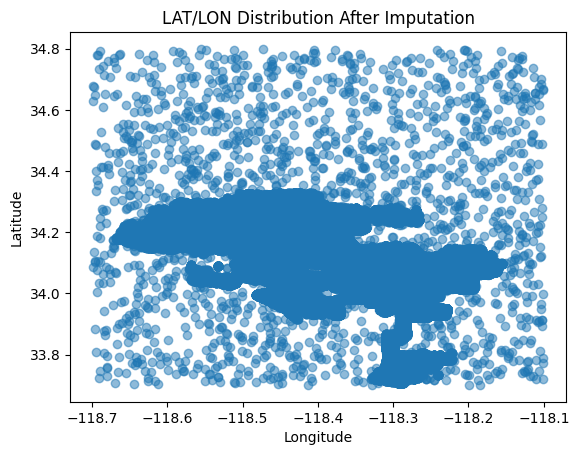

In [14]:
import matplotlib.pyplot as plt
print(df_transformed[['LAT', 'LON']].isnull().sum())
plt.scatter(df['LON'], df['LAT'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('LAT/LON Distribution After Imputation')
plt.show()


Data distributions

In [15]:
df_transformed.head()

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,Wilshire,VEHICLE - STOLEN,0344,O,O,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,1900 S LONGWOOD AV,UNKNOWN,190326475.0,2130.0,7.0,784.0,1.0,510.0,0.0,101.0,400.0,510.0,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,Central,BURGLARY FROM VEHICLE,1822 1402 0344,O,O,BUS STOP/LAYOVER (ALSO QUERY 124),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1000 S FLOWER ST,UNKNOWN,200106753.0,1800.0,1.0,182.0,1.0,330.0,47.0,128.0,400.0,330.0,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,Southwest,BIKE - STOLEN,0344 1251,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1400 W 37TH ST,UNKNOWN,200320258.0,1700.0,3.0,356.0,1.0,480.0,19.0,502.0,400.0,480.0,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,O,O,CLOTHING STORE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,14000 RIVERSIDE DR,UNKNOWN,200907217.0,2037.0,9.0,964.0,1.0,343.0,19.0,405.0,400.0,343.0,34.1576,-118.4387
4,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,Hollenbeck,VEHICLE - STOLEN,0344,H,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,200 E AVENUE 28,UNKNOWN,200412582.0,630.0,4.0,413.0,1.0,510.0,0.0,101.0,400.0,510.0,34.0820,-118.2130


        date      time AM/PM
0 2020-03-01  12:00:00    AM
1 2020-02-08  12:00:00    AM
2 2020-11-04  12:00:00    AM
3 2020-03-10  12:00:00    AM
4 2020-09-09  12:00:00    AM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933425 entries, 0 to 933424
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    933425 non-null  datetime64[ns]
 1   time    933425 non-null  object        
 2   AM/PM   933425 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 21.4+ MB
None
      count
date       
1     87898
3     83429
2     82373
4     79268
7     78846
5     78443
8     77895
10    77563
6     76721
9     74976
11    70057
12    65956


<Figure size 500x500 with 0 Axes>

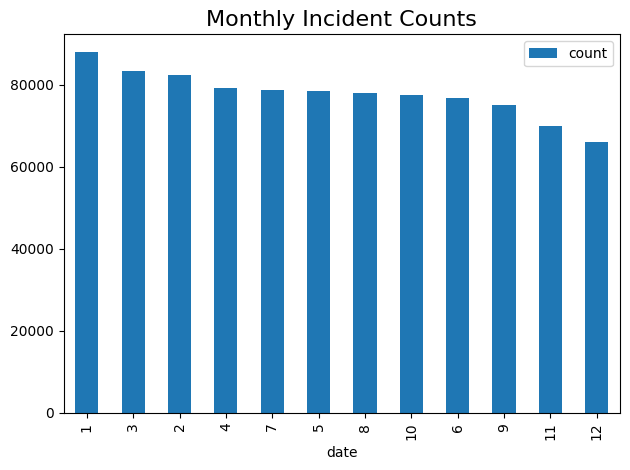

       count
date        
2022  235226
2023  232306
2020  199827
2021  146171
2024  119895


<Figure size 500x500 with 0 Axes>

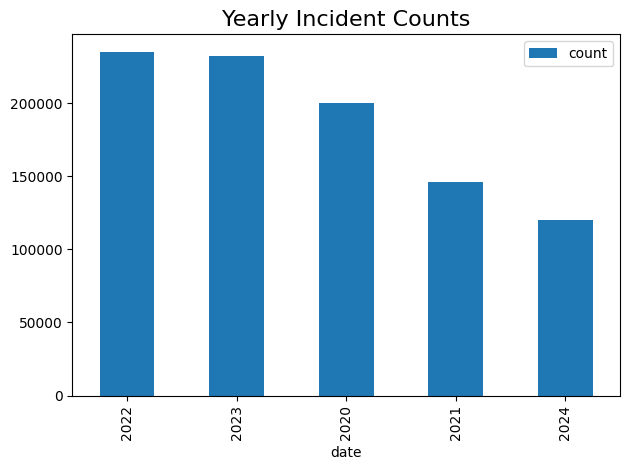

In [16]:
analysis_df = df_transformed['DATE OCC'].str.split(' ', expand=True)
analysis_df.columns = ['date', 'time', 'AM/PM']
analysis_df.loc[analysis_df['AM/PM'] == 'PM'] += pd.Timedelta(hours=12)
analysis_df['date'] = analysis_df['date'].astype('datetime64[ns]')
print(analysis_df.head())
print(analysis_df.info())

monthly_counts = pd.DataFrame(analysis_df['date'].dt.month.value_counts())
print(monthly_counts)
plt.figure(figsize=(5, 5))
monthly_counts.plot(kind='bar')
plt.title('Monthly Incident Counts', fontsize=16)
plt.tight_layout()
plt.show()

yearly_count = pd.DataFrame(analysis_df['date'].dt.year.value_counts())
print(yearly_count)
plt.figure(figsize=(5, 5))
yearly_count.plot(kind='bar')
plt.title('Yearly Incident Counts', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

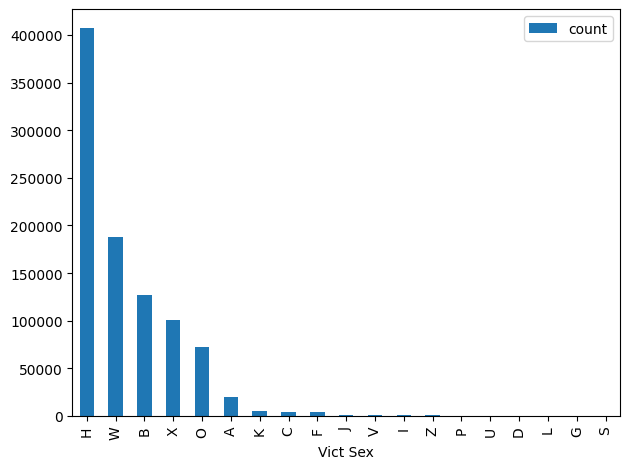

Vict Age
 0.0      251875
 30.0      20746
 31.0      19963
 29.0      19884
 35.0      19810
           ...  
 98.0         61
-2.0          14
-3.0           5
-4.0           3
 120.0         1
Name: count, Length: 104, dtype: int64


In [17]:
plt.figure(figsize=(5, 5))
vict_sex = pd.DataFrame(df_transformed['Vict Sex'].value_counts())
vict_sex.plot(kind='bar')
plt.tight_layout()
plt.show()

print(df_transformed['Vict Age'].value_counts())


Data imbalance

In [18]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933425 entries, 0 to 933424
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Date Rptd       933425 non-null  category
 1   DATE OCC        933425 non-null  category
 2   AREA NAME       933425 non-null  category
 3   Crm Cd Desc     933425 non-null  category
 4   Mocodes         933425 non-null  category
 5   Vict Sex        933425 non-null  category
 6   Vict Descent    933425 non-null  category
 7   Premis Desc     933425 non-null  category
 8   Weapon Desc     933425 non-null  category
 9   Status          933425 non-null  category
 10  Status Desc     933425 non-null  category
 11  LOCATION        933425 non-null  category
 12  Cross Street    933425 non-null  category
 13  DR_NO           933425 non-null  float64 
 14  TIME OCC        933425 non-null  float64 
 15  AREA            933425 non-null  float64 
 16  Rpt Dist No     933425 non-null  float

Machine Learning algorithms

In [ ]:
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split

df_use_case_1 = df_transformed.copy()
label_encoder = LabelEncoder()
df_use_case_1['Vict Sex'] = label_encoder.fit_transform(df_use_case_1['Vict Sex'])
df_use_case_1['Crm Cd Desc'] = label_encoder.fit_transform(df_use_case_1['Crm Cd Desc'])
df_use_case_1['AREA NAME'] = label_encoder.fit_transform(df_use_case_1['AREA NAME'])
df_use_case_1['Mocodes'] = label_encoder.fit_transform(df_use_case_1['Mocodes'])
df_use_case_1['Premis Desc'] = label_encoder.fit_transform(df_use_case_1['Premis Desc'])
# df_use_case_1['Weapon Used Cd'] = label_encoder.fit_transform(df_use_case_1['Weapon Used Cd'])
df_use_case_1['Weapon Desc'] = label_encoder.fit_transform(df_use_case_1['Weapon Desc'])
df_use_case_1['Status'] = label_encoder.fit_transform(df_use_case_1['Status'])
df_use_case_1['Status Desc'] = label_encoder.fit_transform(df_use_case_1['Status Desc'])
df_use_case_1['LOCATION'] = label_encoder.fit_transform(df_use_case_1['LOCATION'])
df_use_case_1['Cross Street'] = label_encoder.fit_transform(df_use_case_1['Cross Street'])

In [22]:
df_use_case_1.head()

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,20,134,36191,11,O,266,65,0,0,21204,8922,190326475.0,2130.0,7.0,784.0,1.0,510.0,0.0,101.0,400.0,510.0,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1,21,253936,11,O,29,65,3,2,1846,8922,200106753.0,1800.0,1.0,182.0,1.0,330.0,47.0,128.0,400.0,330.0,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,15,11,46619,17,X,207,65,3,2,13045,8922,200320258.0,1700.0,3.0,356.0,1.0,480.0,19.0,502.0,400.0,480.0,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,17,106,14688,11,O,40,65,3,2,13239,8922,200907217.0,2037.0,9.0,964.0,1.0,343.0,19.0,405.0,400.0,343.0,34.1576,-118.4387
4,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,5,134,36191,6,H,266,65,3,2,22465,8922,200412582.0,630.0,4.0,413.0,1.0,510.0,0.0,101.0,400.0,510.0,34.0820,-118.2130


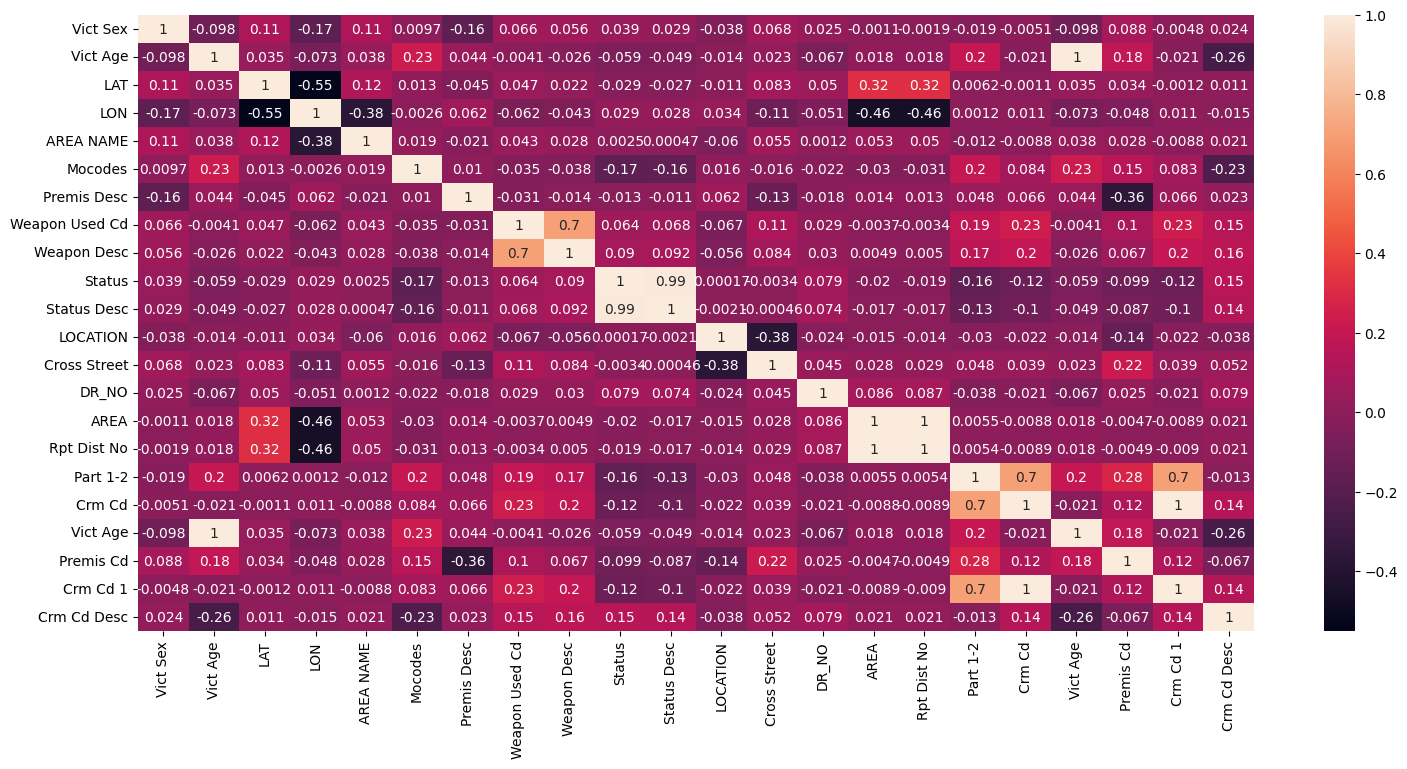

In [30]:
corr_matrix = df_use_case_1[['Vict Sex', 'Vict Age', 'LAT', 'LON', 'AREA NAME', 'Mocodes', 'Premis Desc', 
                   'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 
                   'Cross Street', 'DR_NO', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 
                   'Vict Age', 'Premis Cd', 'Crm Cd 1', 'Crm Cd Desc']].corr()
import seaborn as sns
plt.figure(figsize=(18, 8))
sns.heatmap(data=corr_matrix,fmt = '.2g', annot=True)
plt.show()

In [41]:
df_use_case_1['Crm Cd Desc'].value_counts()

Crm Cd Desc
134    106546
4       70347
21      58976
131     57068
116     56711
        ...  
46          4
59          4
64          3
128         1
55          1
Name: count, Length: 140, dtype: int64

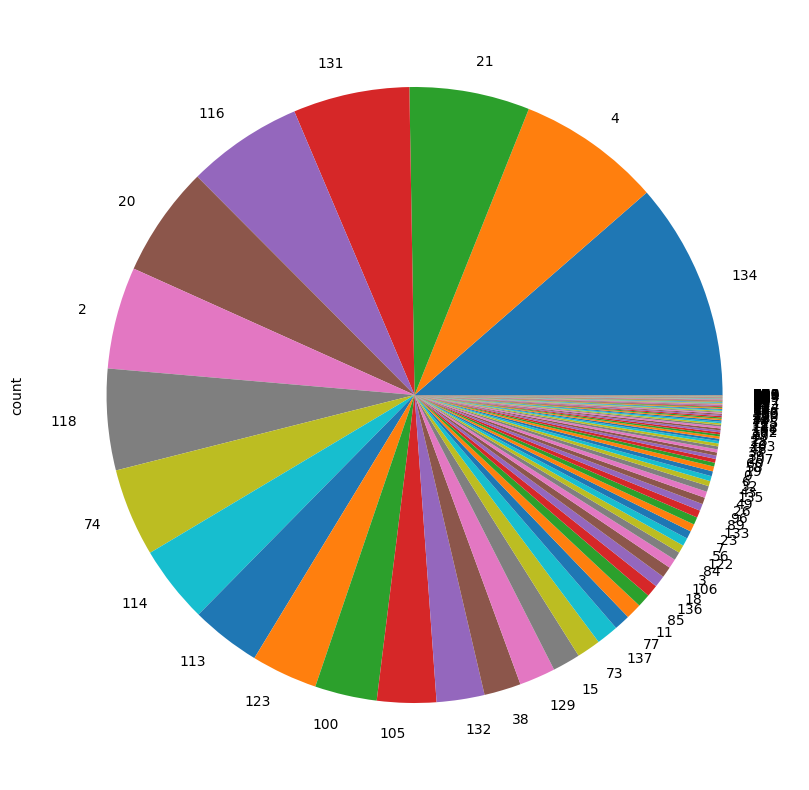

In [47]:
target_col = df_use_case_1['Crm Cd Desc'].value_counts()
plt.figure(figsize=(15, 10))
target_col.plot(kind='pie')
plt.show()

In [ ]:
X = df_use_case_1[['Vict Sex', 'Vict Age', 'LAT', 'LON', 'AREA NAME', 'Mocodes', 'Premis Desc', 
                   'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 
                   'Cross Street', 'DR_NO', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 
                   'Vict Age', 'Premis Cd', 'Crm Cd 1']]
y = df_use_case_1['Crm Cd Desc']
df_use_case_1 = df_use_case_1.dropna(subset=['Crm Cd Desc'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.head(), y_train.head())

        Vict Sex  Vict Age      LAT       LON  AREA NAME  Mocodes  \
93498         16      43.0  33.7906 -118.2389          4   267121   
237925         6       0.0  34.1139 -118.3192          6    36191   
175174        17       0.0  34.2744 -118.5123          2    36191   
241265         6       0.0  34.0299 -118.3595         15    36191   
461798         6      26.0  34.0527 -118.1969          5    94353   

        Premis Desc  Weapon Used Cd  Weapon Desc  Status  Status Desc  \
93498           225           400.0           65       3            2   
237925           63           400.0           65       3            2   
175174           63           400.0           65       3            2   
241265          266           400.0           65       3            2   
461798          266           102.0           27       3            2   

        LOCATION  Cross Street        DR_NO  AREA  Rpt Dist No  Part 1-2  \
93498      61428          3997  200507496.0   5.0        519.0       2

Evaluation of ML algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
rf = RandomForestClassifier(n_estimators=50, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
models = {
    'Random Forest': rf, 
    'Decision Tree': dt
    }
performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    performance[model_name] = {'accuracy': accuracy, 'report': report}
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{report}\n")


Training Random Forest...


/Users/apple/Documents/crime-data-analysis/crimeenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/apple/Documents/crime-data-analysis/crimeenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/apple/Documents/crime-data-analysis/crimeenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Random Forest Accuracy: 0.9973
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       0.99      0.99      0.99       200
           2       1.00      1.00      1.00      9961
           3       1.00      1.00      1.00       923
           4       1.00      1.00      1.00     13960
           5       1.00      0.94      0.97        47
           6       0.99      1.00      1.00       489
           7       0.98      0.99      0.98       783
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.99      1.00      1.00      1584
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00        18
          14       0.94      0.99      0.96        91
          15       1.00      1.00      1.00      2799
          16       0.00      0.00      0.00         1
          17 

/Users/apple/Documents/crime-data-analysis/crimeenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/apple/Documents/crime-data-analysis/crimeenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Accuracy: 1.0000
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00      9961
           3       1.00      1.00      1.00       923
           4       1.00      1.00      1.00     13960
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00       489
           7       1.00      1.00      1.00       783
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00      1584
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        91
          15       1.00      1.00      1.00      2799
          16       1.00      1.00      1.00         1
          17 

/Users/apple/Documents/crime-data-analysis/crimeenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


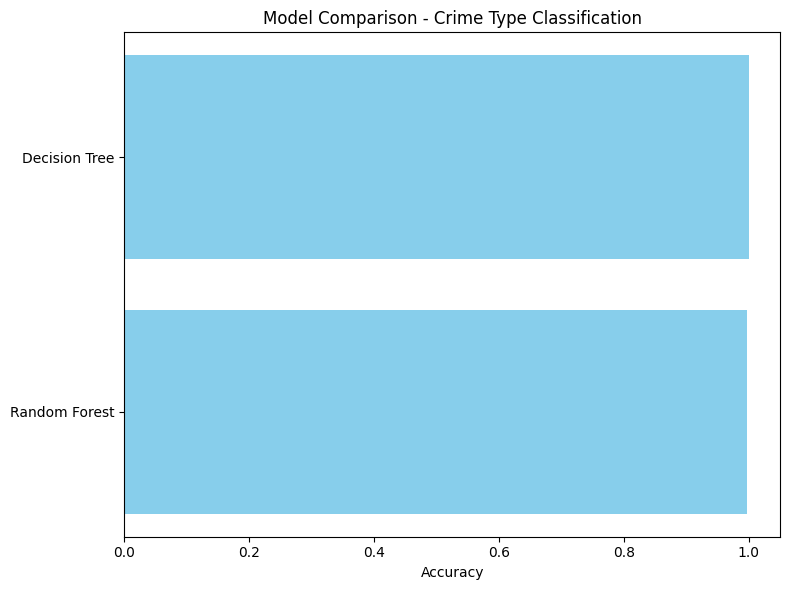

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy scores of each model
model_names = list(performance.keys())
accuracy_scores = [performance[model]['accuracy'] for model in model_names]

plt.figure(figsize=(8, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Crime Type Classification')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
import pandas as pd
df_use_case_1 = df_transformed.copy()
df_use_case_1 = df_use_case_1.dropna(subset=['LOCATION', 'AREA', 'LAT', 'LON'])
numerical_features = ['Vict Sex', 'Vict Age', 'Weapon Used Cd', 'DR_NO', 
                      'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Premis Cd', 'Crm Cd 1']
categorical_features = ['AREA NAME', 'Mocodes', 'Premis Desc', 'Weapon Desc', 
                        'Status', 'Status Desc', 'Cross Street']
for col in categorical_features:
    frequent_categories = df_use_case_1[col].value_counts().nlargest(10).index
    df_use_case_1[col] = df_use_case_1[col].apply(
        lambda x: x if x in frequent_categories else "Other"
    )
label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df_use_case_1[col] = label_encoders[col].fit_transform( df_use_case_1[col].astype(str))
label_encoder_location = LabelEncoder()

label_encoder_area = LabelEncoder()
df_use_case_1['LOCATION Encoded'] = label_encoder_location.fit_transform(df_use_case_1['LOCATION'])
df_use_case_1['AREA Encoded'] = label_encoder_area.fit_transform(df_use_case_1['AREA'])

X = pd.concat([df_use_case_1[numerical_features], df_use_case_1[ categorical_features]], axis=1)
y_regression = df_use_case_1[['LAT', 'LON']]
y_classification = df_use_case_1[['AREA Encoded', 'LOCATION Encoded'] ]

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
columns_to_drop = []
for col in y_classification.columns:
    class_counts = y_classification[col].value_counts( )
    rare_classes = class_counts[class_counts < 2].index 

    if len(rare_classes) > 0: 
        print(f"Dropping column '{col}' due to rare classes: {rare_classes}")
        columns_to_drop.append(col)
y_classification = y_classification.drop(columns=columns_to_drop)
columns_to_drop_from_X = [col for col in columns_to_drop if col in X.columns]
X = X.drop(columns=columns_to_drop_from_X)
if y_classification.empty:
    raise ValueError("All target columns had rare classes and were dropped. ")
x_train, x_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.4, random_state=42)

x_train_cls, x_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.4, random_state=42)
regressor = MultiOutputRegressor(HistGradientBoostingRegressor(random_state=42) )
regressor.fit(x_train, y_train_reg)

y_pred_reg = regressor.predict(x_test)
print("Regression Task:")
for i, target in enumerate(['LAT', 'LON']):

    mse = mean_squared_error(y_test_reg.iloc[:, i], y_pred_reg[:, i ])
    print(f"{target} - Mean Squared Error: {mse :.4f}")
if not y_classification.empty:
    classifier = MultiOutputClassifier(HistGradientBoostingClassifier(random_state=42 ))
    classifier.fit(x_train_cls, y_train_cls)
    y_pred_cls = classifier.predict(x_test_cls)

    print("\nClassification Task:")
    for i, target in enumerate(y_classification.columns):
        acc = accuracy_score(y_test_cls.iloc[:, i], y_pred_cls[:, i ])
        print(f"{target} - Accuracy: {acc:.4f}")
        print(classification_report(y_test_cls.iloc[:, i], y_pred_cls[:, i]))


Dropping column 'LOCATION Encoded' due to rare classes: Index([49180, 12144, 23871, 27861, 64643, 17858, 60012, 62873, 21031, 52659,
       ...
       48517, 35387, 15944, 23410, 59106, 34939, 58028, 43654, 62569,  8769],
      dtype='int64', name='LOCATION Encoded', length=13516)
Regression Task:
LAT - Mean Squared Error: 0.0004
LON - Mean Squared Error: 0.0005

Classification Task:
AREA Encoded - Accuracy: 0.9990
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27569
           1       1.00      1.00      1.00     18460
           2       1.00      1.00      1.00     22565
           3       1.00      1.00      1.00     14634
           4       1.00      1.00      1.00     16349
           5       1.00      1.00      1.00     20698
           6       1.00      1.00      1.00     18968
           7       1.00      1.00      1.00     17877
           8       1.00      1.00      1.00     16958
           9       1.00      0.99      1